In [1]:
#standard ds imports
import pandas as pd
import numpy as np
import os

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#import custom modules
from env import get_db_url

#import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

# For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

### You will have a zillow.ipynb file and a helper file for each section in the pipeline.

## Acquire and Summarize

## 1. Acquire data from the cloud database.

### You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

### Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:

def acquire_zillow():
    '''
    This function checks to see if zillow.csv already exists, 
    if it does not, one is created
    '''
    #check to see if zillow.csv already exist
    if os.path.isfile('zillow.csv'):
        df = pd.read_csv('zillow.csv', index_col=0)
    
    else:
        
        url = get_db_url('zillow')
        df = pd.read_sql('''SELECT prop.*, 
                           pred.logerror, 
                           pred.transactiondate, 
                           air.airconditioningdesc, 
                           arch.architecturalstyledesc, 
                           build.buildingclassdesc, 
                           heat.heatingorsystemdesc, 
                           landuse.propertylandusedesc, 
                           story.storydesc, 
                           construct.typeconstructiondesc 

                    FROM   properties_2017 prop  
                           INNER JOIN (SELECT parcelid,
                                              logerror,
                                              Max(transactiondate) transactiondate 
                                       FROM   predictions_2017 
                                       GROUP  BY parcelid, logerror) pred
                                   USING (parcelid) 
                           LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
                           LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
                           LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
                           LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
                           LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
                           LEFT JOIN storytype story USING (storytypeid) 
                           LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
                    WHERE  prop.latitude IS NOT NULL 
                           AND prop.longitude IS NOT NULL AND transactiondate <= '2017-12-31'
                            ;''', url)
        #creates new csv if one does not already exist
        df.to_csv('zillow.csv')


    return df

In [3]:
df = acquire_zillow()
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,None,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,None,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,None,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,None,NaN,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77569,2864704,10833991,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1741.0,1741.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34202400.0,-118502000.0,59487.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LARD3,6.037132e+07,12447.0,3101.0,32368.0,96415.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1980.0,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,None,NaN,6.037132e+13,-0.002245,2017-09-20,Central,None,None,Central,Condominium,None,None
77570,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,NaN,1286.0,1286.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,3

In [4]:
from wrangle import acquire_zillow

In [5]:
df = acquire_zillow()
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77569,2864704,10833991,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1741.0,1741.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34202400.0,-118502000.0,59487.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LARD3,6.037132e+07,12447.0,3101.0,32368.0,96415.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1980.0,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13,-0.002245,2017-09-20,Central,NaN,NaN,Central,Condominium,NaN,NaN
77570,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,NaN,1286.0,1286.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34245368.0,-118282383.0,47405.0,NaN,NaN,N

In [6]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [7]:
df.longitude.isnull().value_counts()

False    77574
Name: longitude, dtype: int64

In [8]:
df.shape

(77574, 68)

In [9]:
df.fips.value_counts()

6037.0    50694
6059.0    20630
6111.0     6250
Name: fips, dtype: int64

## 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77574 entries, 0 to 77573
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77574 non-null  int64  
 1   parcelid                      77574 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77574 non-null  float64
 6   bedroomcnt                    77574 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49808 non-null  float64
 9   calculatedbathnbr             76959 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77374 non-null  float64
 13  f

In [11]:
for col in df.columns.to_list():
    print(col)
    print(df[col].nunique())
    #print(df[col].count())

id
77381
parcelid
77381
airconditioningtypeid
5
architecturalstyletypeid
5
basementsqft
43
bathroomcnt
22
bedroomcnt
16
buildingclasstypeid
2
buildingqualitytypeid
12
calculatedbathnbr
21
decktypeid
1
finishedfloor1squarefeet
1787
calculatedfinishedsquarefeet
4972
finishedsquarefeet12
4868
finishedsquarefeet13
13
finishedsquarefeet15
1724
finishedsquarefeet50
1807
finishedsquarefeet6
350
fips
3
fireplacecnt
5
fullbathcnt
13
garagecarcnt
14
garagetotalsqft
839
hashottuborspa
1
heatingorsystemtypeid
10
latitude
64038
longitude
62461
lotsizesquarefeet
18848
poolcnt
1
poolsizesum
262
pooltypeid10
1
pooltypeid2
1
pooltypeid7
1
propertycountylandusecode
75
propertylandusetypeid
13
propertyzoningdesc
1907
rawcensustractandblock
39192
regionidcity
175
regionidcounty
3
regionidneighborhood
480
regionidzip
389
roomcnt
16
storytypeid
1
threequarterbathnbr
4
typeconstructiontypeid
4
unitcnt
8
yardbuildingsqft17
540
yardbuildingsqft26
59
yearbuilt
136
numberofstories
4
fireplaceflag
1
structuretaxv

In [12]:
def nulls_by_col(df):
    num_missing = df.isnull().sum() 
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing

In [13]:
def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # value_counts()
    # observation of nulls in the dataframe
    '''
    print('=====================================================\n\n')
    print('Dataframe head: ')
    print(df.head(3))
    print('=====================================================\n\n')
    print('Dataframe info: ')
    print(df.info())
    print('=====================================================\n\n')
    print('Dataframe Description: ')
    print(df.describe())
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    cat_cols = [col for col in df.columns if col not in num_cols]
    print('=====================================================')
    print('DataFrame value counts: ')
    for col in df.columns:
        if df[col].nunique()<10:
            print(df[col].value_counts())
        elif col in cat_cols:
            print(df[col].value_counts())
        else:
            print(df[col].value_counts(bins=10, sort=False))
    print('=====================================================')
    print('nulls in dataframe by column: ')
    print(nulls_by_col(df))
    print('=====================================================')
    print('nulls in dataframe by row: ')
    print(nulls_by_row(df))
    print('=====================================================')

In [14]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'customer_id': 'num_rows'}).reset_index()
    return rows_missing

In [15]:
summarize(df)



Dataframe head: 
        id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0  1727539  14297519                    NaN                       NaN   
1  1387261  17052889                    NaN                       NaN   
2    11677  14186244                    NaN                       NaN   

   basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0           NaN          3.5         4.0                  NaN   
1           NaN          1.0         2.0                  NaN   
2           NaN          2.0         3.0                  NaN   

   buildingqualitytypeid  calculatedbathnbr  decktypeid  \
0                    NaN                3.5         NaN   
1                    NaN                1.0         NaN   
2                    NaN                2.0         NaN   

   finishedfloor1squarefeet  calculatedfinishedsquarefeet  \
0                       NaN                        3100.0   
1                    1465.0                        1465.0   
2      

                 id      parcelid  airconditioningtypeid  \
count  7.757400e+04  7.757400e+04           25006.000000   
mean   1.495340e+06  1.300630e+07               1.812045   
std    8.609689e+05  3.478043e+06               2.965823   
min    3.490000e+02  1.071186e+07               1.000000   
25%    7.520875e+05  1.153819e+07               1.000000   
50%    1.498169e+06  1.253050e+07               1.000000   
75%    2.240588e+06  1.421124e+07               1.000000   
max    2.982274e+06  1.676893e+08              13.000000   

       architecturalstyletypeid  basementsqft   bathroomcnt    bedroomcnt  \
count                206.000000     50.000000  77574.000000  77574.000000   
mean                   7.388350    679.720000      2.298521      3.053252   
std                    2.734542    689.703546      0.996706      1.140447   
min                    2.000000     38.000000      0.000000      0.000000   
25%                    7.000000    273.000000      2.000000      2.000000 

(-0.017, 1.6]     4227
(1.6, 3.2]       49657
(3.2, 4.8]       17549
(4.8, 6.4]        5550
(6.4, 8.0]         461
(8.0, 9.6]          70
(9.6, 11.2]         40
(11.2, 12.8]        16
(12.8, 14.4]         3
(14.4, 16.0]         1
Name: bedroomcnt, dtype: int64
4.0    14
3.0     1
Name: buildingclasstypeid, dtype: int64
(0.988, 2.1]       35
(2.1, 3.2]        335
(3.2, 4.3]       9507
(4.3, 5.4]       2099
(5.4, 6.5]      13501
(6.5, 7.6]       5981
(7.6, 8.7]      14685
(8.7, 9.8]       2303
(9.8, 10.9]       313
(10.9, 12.0]     1049
Name: buildingqualitytypeid, dtype: int64
(0.982, 2.7]    52527
(2.7, 4.4]      21745
(4.4, 6.1]       2364
(6.1, 7.8]        177
(7.8, 9.5]        134
(9.5, 11.2]        10
(11.2, 12.9]        0
(12.9, 14.6]        1
(14.6, 16.3]        0
(16.3, 18.0]        1
Name: calculatedbathnbr, dtype: int64
66.0    614
Name: decktypeid, dtype: int64
(37.131, 730.8]      702
(730.8, 1417.6]     3035
(1417.6, 2104.4]    1735
(2104.4, 2791.2]     336
(2791.2, 3478.0]

2017-06-30    1194
2017-04-28     917
2017-05-31     868
2017-07-28     815
2017-08-31     782
2017-03-31     771
2017-05-26     745
2017-06-16     728
2017-06-23     707
2017-08-25     696
2017-07-07     687
2017-09-01     669
2017-07-14     619
2017-08-11     619
2017-05-05     618
2017-09-08     615
2017-06-01     614
2017-03-24     611
2017-07-31     601
2017-05-12     598
2017-05-19     594
2017-06-29     585
2017-08-18     584
2017-06-09     579
2017-07-21     573
2017-03-28     573
2017-02-28     571
2017-04-14     571
2017-06-02     567
2017-04-21     559
2017-08-30     549
2017-04-07     544
2017-03-17     538
2017-05-25     537
2017-03-30     520
2017-06-27     515
2017-06-15     510
2017-06-28     510
2017-06-22     507
2017-09-06     492
2017-08-15     491
2017-08-29     491
2017-05-23     480
2017-07-27     480
2017-07-26     473
2017-06-20     468
2017-06-21     467
2017-04-27     462
2017-06-14     460
2017-08-16     459
2017-03-29     458
2017-07-18     458
2017-05-24  

## 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

The output should look like the table below:

```                 num_rows_missing	pct_rows_missing\
parcelid	                       0	0.000000\
airconditioningtypeid          29041	0.535486\
architecturalstyletypeid	   54232	0.999982\```

In [16]:
def nulls_by_col(df):
    num_missing = df.isnull().sum() 
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing

def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'customer_id': 'num_rows'}).reset_index()
    return rows_missing

In [17]:
nulls_df = nulls_by_col(df)
nulls_df

,num_rows_missing,percent_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52568,67.764973
architecturalstyletypeid,77368,99.734447
basementsqft,77524,99.935545
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingclasstypeid,77559,99.980664
buildingqualitytypeid,27766,35.792920
calculatedbathnbr,615,0.792791


# Prepare

## 1.  Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [18]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [19]:
df.propertylandusedesc.value_counts()

Single Family Residential                     52438
Condominium                                   19341
Duplex (2 Units, Any Combination)              2021
Planned Unit Development                       1947
Quadruplex (4 Units, Any Combination)           729
Triplex (3 Units, Any Combination)              539
Cluster Home                                    335
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       59
Residential General                              41
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [20]:
len(df)

77574

In [21]:
df = df[(df['propertylandusedesc'] != 'Duplex (2 Units, Any Combination)') & 
    (df['propertylandusedesc'] != 'Condominium') &
    (df['propertylandusedesc'] != 'Commercial/Office/Residential Mixed Used') & 
    (df['propertylandusedesc'] != 'Townhouse') & 
    (df['propertylandusedesc'] != 'Triplex (3 Units, Any Combination)')]


In [22]:
df.propertylandusedesc.value_counts()

Single Family Residential                     52438
Planned Unit Development                       1947
Quadruplex (4 Units, Any Combination)           729
Cluster Home                                    335
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       59
Residential General                              41
Cooperative                                      29
Name: propertylandusedesc, dtype: int64

## 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [23]:
df.fips.value_counts()

6037.0    36609
6059.0    14238
6111.0     4805
Name: fips, dtype: int64

In [24]:
def drop_rows_cols_over(df, row_threshold, col_threshold):
    #drop columns with a null percentage greater than the col_threshold argument
    df = df.loc[:, df.isna().mean() < col_threshold]
    #transpose the dataframe
    df = df.T
    #drop columns with a null percentage greater than the row_threshold argument
    df = df.loc[:, df.isna().mean() < row_threshold]
    return df.T

In [25]:

# cols_to_drop = []
# rows_to_drop = []

# def handle_missing_values(df, prop_required_column, prop_required_row):
    

#     # creating loop
#     for i in range(0, len(df.columns)):  
# #         print(df.columns[i])
#         if df.iloc[:, i].isnull().sum()/len(df.iloc[:, i]) >= prop_required_column:
#             cols_to_drop.append(df.columns[i])
            
#     df = df.drop(columns=cols_to_drop)
    
#     for j in range(0, len(df.T.columns)):  
#         #print(df.T.iloc[j])
#         if df.T.iloc[:, j].isnull().sum().sum()/len(df.T.index) >= prop_required_row:
#             rows_to_drop.append(df.columns[i])
#     df = df.T.drop(columns=rows_to_drop).T
#             #df.drop(df.iloc[j:j+1])  
            
#     return df

In [26]:
df = drop_rows_cols_over(df, .4, .25)
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,261.0,60590630.072012,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,60590630072012.0,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,261.0,61110010.023006,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,61110010023006.0,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,261.0,60590218.022012,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.3,60590218022012.0,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,261.0,60373001.001006,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,60373001001006.0,-0.10341,2017-01-01,Single Family Residential
6,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,261.0,60374608.001014,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,60374608001014.0,-0.001011,2017-01-01,Single Family Residential


In [27]:
df.fips.value_counts()

6037.0    36609
6059.0    14238
6111.0     4805
Name: fips, dtype: int64

In [28]:
# def handle_missing_values(df, prop_required_column, prop_required_row):
#     cols_to_drop = []
#     rows_to_drop = []

#     for i in range(len(df.columns)):
#         if df.iloc[:, i].isnull().sum() / len(df.iloc[:, i]) >= prop_required_column:
#             cols_to_drop.append(df.columns[i])

#     for j in range(len(df.index)):
#         if df.T.iloc[j, :].isnull().sum() / len(df.T.iloc[j, :]) >= prop_required_row:
#             rows_to_drop.append(df.T.column[j])

#     return cols_to_drop, rows_to_drop


In [29]:
from wrangle import clean_zillow

In [30]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,261.0,60590630.072012,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,60590630072012.0,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,261.0,61110010.023006,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,61110010023006.0,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,261.0,60590218.022012,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.3,60590218022012.0,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,261.0,60373001.001006,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,60373001001006.0,-0.10341,2017-01-01,Single Family Residential
6,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,261.0,60374608.001014,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,60374608001014.0,-0.001011,2017-01-01,Single Family Residential


In [31]:
len(df)

55652

In [32]:
df.shape

(55652, 29)

In [33]:
df.fips.value_counts()

6037.0    36609
6059.0    14238
6111.0     4805
Name: fips, dtype: int64

In [34]:
# take a look at null counts again

df.isnull().sum()

id                                 0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                316
calculatedfinishedsquarefeet     137
finishedsquarefeet12            1064
fips                               0
fullbathcnt                      316
latitude                           0
longitude                          0
lotsizesquarefeet                481
propertycountylandusecode          0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                    1156
regionidcounty                     0
regionidzip                       30
roomcnt                            0
yearbuilt                        179
structuretaxvaluedollarcnt        99
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              2
taxamount                          4
censustractandblock              138
logerror                           0
t

In [38]:
df.fips.value_counts()

6037.0    35656
6059.0    13845
6111.0     4741
Name: fips, dtype: int64

In [41]:
# buildingqualitytypeid
# Overall assessment of condition of the building from 
# low number = best quality
# higher numbers = worse quality

df.buildingqualitytypeid.value_counts(dropna = False)

6.0     29375
8.0      9141
4.0      8314
7.0      3592
5.0      1563
9.0      1215
11.0      566
10.0      228
3.0       157
12.0       80
1.0         6
2.0         5
Name: buildingqualitytypeid, dtype: int64

In [42]:
df[df.fips == 6059].buildingqualitytypeid.value_counts(dropna = False)

6.0    13845
Name: buildingqualitytypeid, dtype: int64

In [43]:
# what is the median value of buildingqualitytypeid?

df.buildingqualitytypeid.median()

6.0

In [44]:
# should I fill missing values for buildingqualitytypeid with median value?
df.buildingqualitytypeid.fillna(df.buildingqualitytypeid.median(), inplace = True)

In [45]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
dtype: int64

<Axes: >

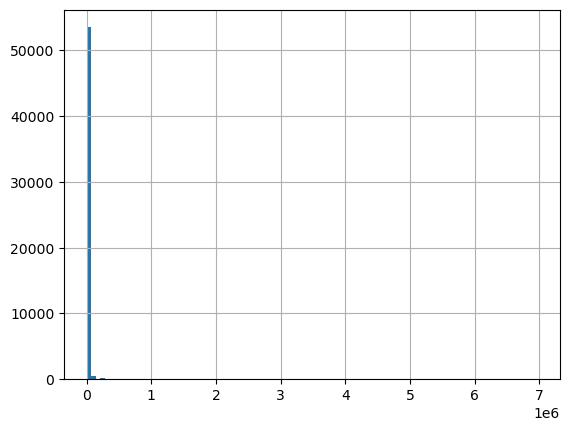

In [46]:
# look at lot-size distribution
df.lotsizesquarefeet.hist(bins = 100)

In [47]:
# what is the median lot size?

df.lotsizesquarefeet.median()

6795.0

In [48]:
# fill missing values with median null sizes

df.lotsizesquarefeet.fillna(df.lotsizesquarefeet.median(), inplace = True)

In [49]:
df.shape

(54242, 22)

In [50]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
dtype: int64

In [51]:
df[df.calculatedfinishedsquarefeet.isnull()]

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate


In [52]:
df.calculatedfinishedsquarefeet.median()

1666.0

In [53]:
df.calculatedfinishedsquarefeet.fillna(df.calculatedfinishedsquarefeet.median(), inplace = True)

In [54]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
dtype: int64

In [55]:
# I am going to drop the rest of nulls 

df.dropna(inplace = True)

In [56]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
dtype: int64

In [57]:
# How many rows and columns are left?

df.shape

(54242, 22)

<Axes: ylabel='taxvaluedollarcnt'>

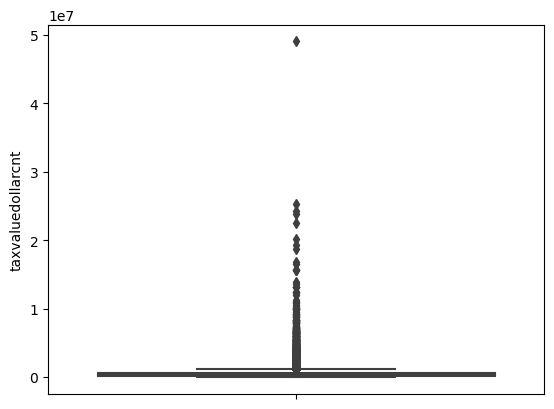

In [58]:
# plt.subplot(221)
sns.boxplot(y = 'taxvaluedollarcnt', data = df)

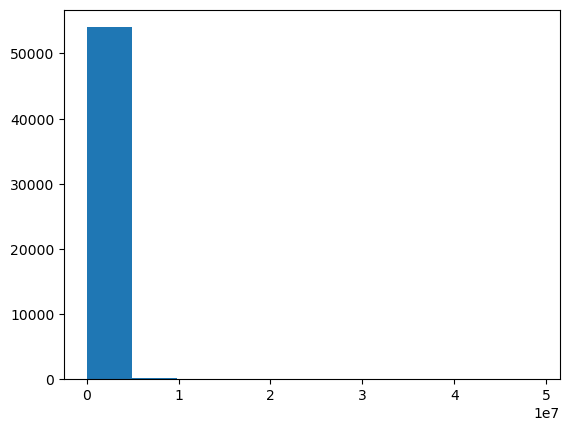

In [59]:
#Histograms for taxvalue of properties

plt.hist(df.taxvaluedollarcnt);

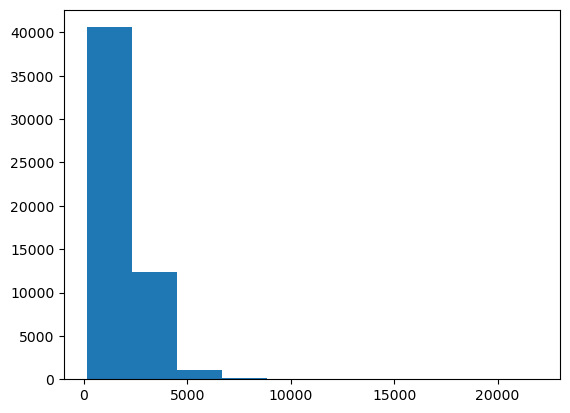

In [60]:
#Histograms for covered sq ft of properties

plt.hist(df.calculatedfinishedsquarefeet);

In [61]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,60590630.072012,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,61110010.023006,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,60590218.022012,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.3,0.005383,2017-01-01
3,12177905,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,60373001.001006,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.10341,2017-01-01
6,12095076,3.0,4.0,9.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,60374608.001014,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,-0.001011,2017-01-01


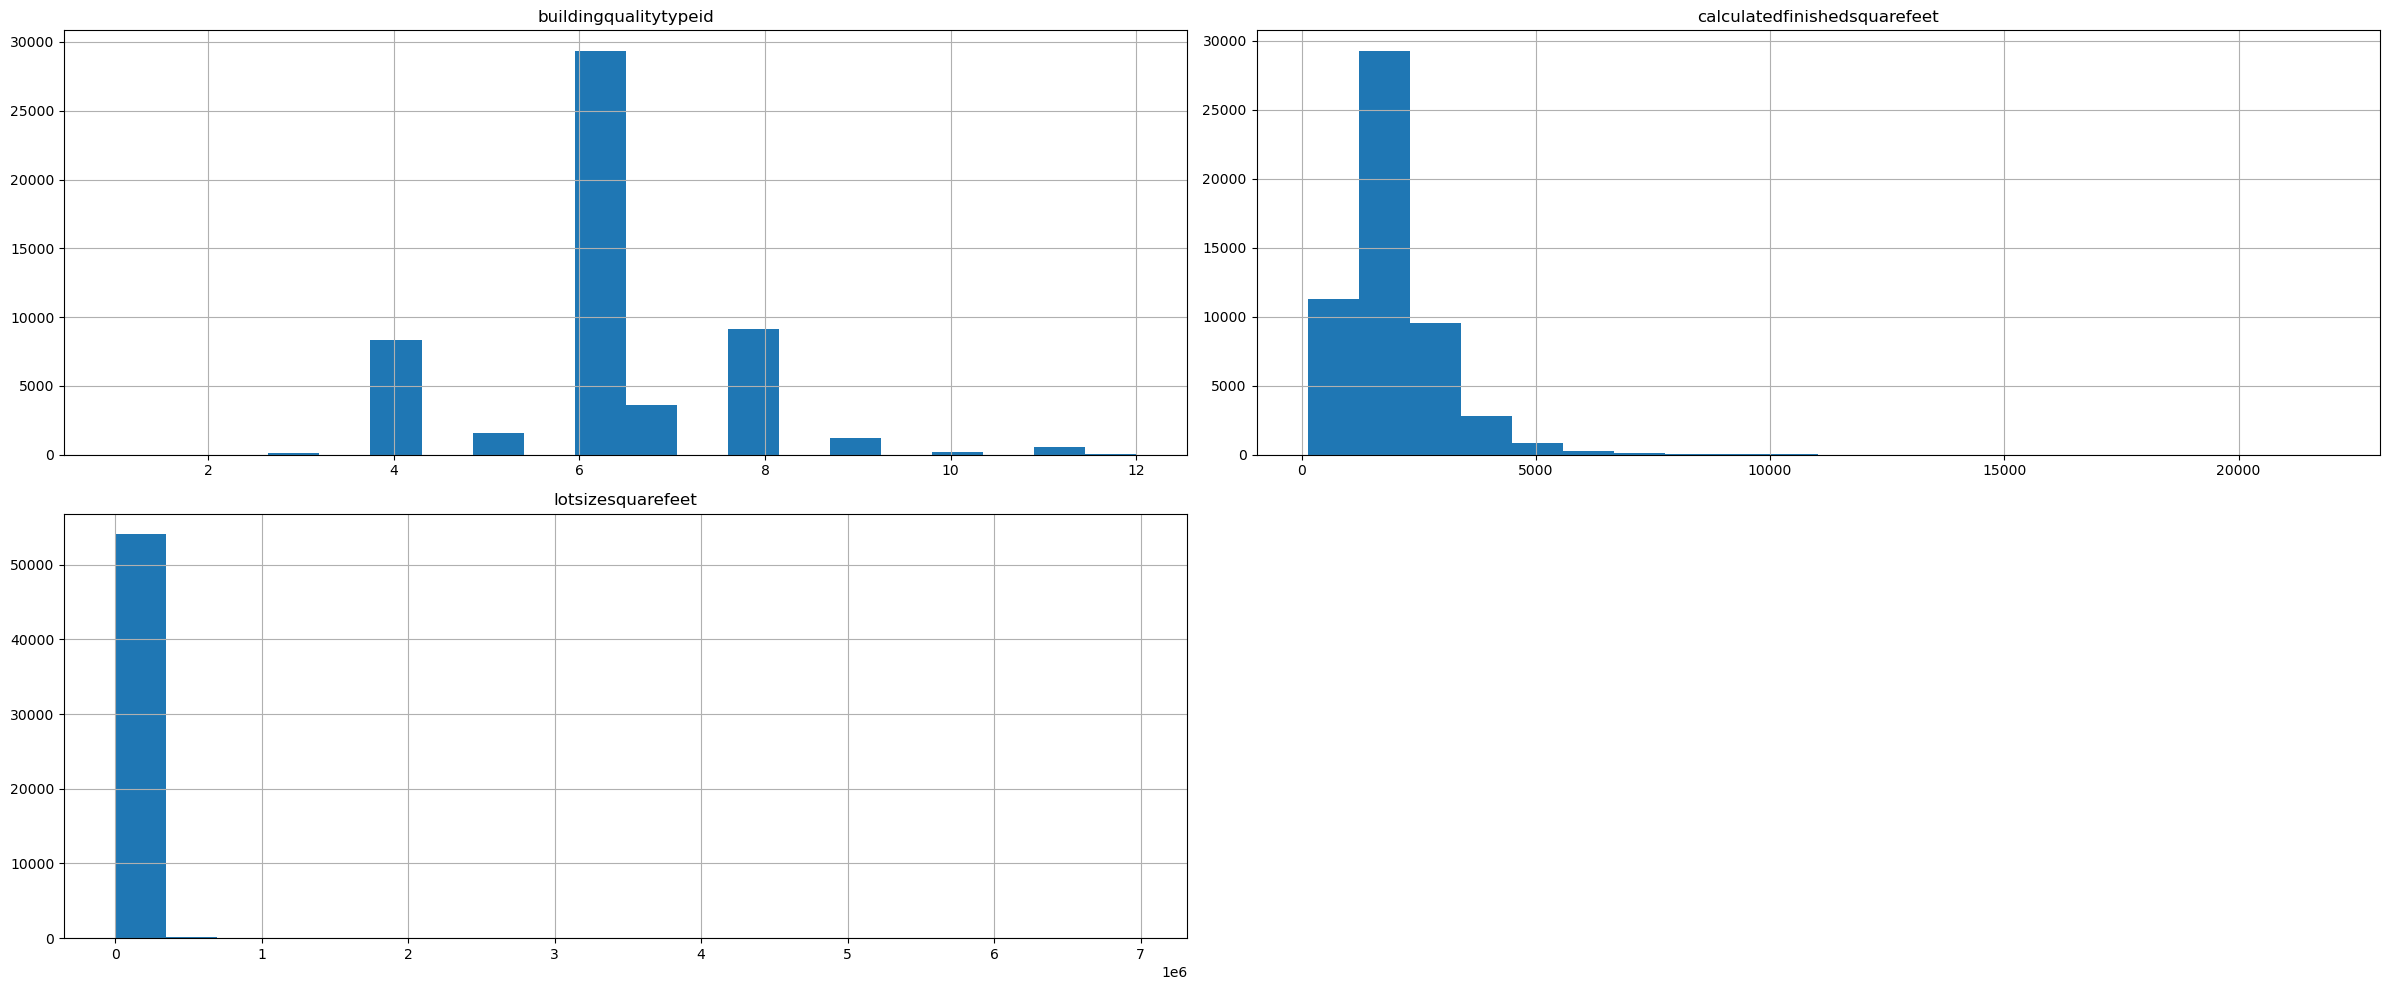

In [62]:
# look at distributions for all columns

df.hist(figsize=(24, 10), bins=20)
plt.tight_layout();

In [63]:
df = clean_zillow()

In [64]:
df

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,60590630.072012,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,61110010.023006,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,60590218.022012,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.3,0.005383,2017-01-01
3,12177905,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,60373001.001006,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.10341,2017-01-01
6,12095076,3.0,4.0,9.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,60374608.001014,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,-0.001011,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77568,12412492,2.0,4.0,6.0,1633.0,6037.0,33870815.0,-118070858.0,4630.0,60375548.022001,30267.0,3101.0,96204.0,0.0,1962.0,125466.0,346534.0,2016.0,221068.0,4175.08,0.001082,2017-09-19
77570,11000655,2.0,2.0,6.0,1286.0,6037.0,34245368.0,-118282383.0,47405.0,60371014.003002,12447.0,3101.0,96284.0,0.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,0.020615,2017-09-20
77571,17239384,2.0,4.0,6.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,61110084.022016,27110.0,2061.0,97116.0,7.0,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,0.013209,2017-09-21
77572,12773139,1.0,3.0,4.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,60374338.022005,36502.0,3101.0,96480.0,0.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,0.037129,2017-09-21


The input:
A dataframe
A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
The output:
The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
hint:
Look up the dropna documentation.
You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

Encapsulate your work inside of functions in a wrangle_zillow.py module.